<a href="https://colab.research.google.com/github/flaviabiaty/imersao_dados/blob/main/ImersaoAlura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Etapa 1** *importando e explorando os dados*

In [2]:
import pandas as pd

Importação da base de dados (.csv) disponibilizada em gitHub

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

Mostrar as primeiras linhas da base (head) para podermos conhecer a estrutura:

In [4]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Apresentar os tipos dos dados de cada coluna:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


Apresentar as estatísticas descritivas dos dados quantitativos da base


In [6]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Mostrar a dimensão da base de dados: linhas, colunas

In [7]:
df.shape

(133349, 11)

In [8]:
linhas, colunas = df.shape[0], df.shape[1]
print("linhas: ",linhas)
print("colunas: ",colunas)


linhas:  133349
colunas:  11


Apresentar o título de todas as colunas da base:

In [9]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomear título das colunas para português

In [10]:
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
display(df.head())

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


Análise das variáveis qualitativas: criação de tabelas de frequência via value_counts()

In [11]:
df["senioridade"].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [12]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [13]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


Traduzir labels dos dados para dar maior clareza

In [14]:
senioridade = {
    'SE': 'Senior',
    'MI': 'Pleno',
    'EN': 'Junior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(senioridade)
df["senioridade"].value_counts()


,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [15]:
contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Tempo Parcial',
    'PT': 'Freelancer',
    'FL': 'Contrato'
}

df["contrato"]=df["contrato"].replace(contrato)
df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Tempo Parcial,394
Freelancer,376
Contrato,16


In [16]:
tamanho_empresa = {
    'M': 'Media',
    'L': 'Grande',
    'S': 'Pequena',
}

df["tamanho_empresa"]=df["tamanho_empresa"].replace(tamanho_empresa)
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [17]:
remoto = {
    0: 'Presencial',
    50: 'Hibrido',
    100: 'Remoto',
}

df["remoto"]=df["remoto"].replace(remoto)
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


Criar tabela de frequência para todos os dados qualitativos da base

In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


##**Etapa 2** *limpeza e preparação da base*

Identificar onde há dados nulos

---



In [20]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


Especificar quais os anos que existem na base. Método com os valores únicos do campo: unique()

In [ ]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Exibir os registros que são nan (Not a Number)

In [21]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande




---



Criação de um novo dataframe somente para exemplificar o tratamento de valores nulos

Nesse teste, vou preencher com a média e a mediana dos demais valores

In [22]:
import numpy as np
#criação de dataframe de teste
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
                            })

#calcula a média salarial e substitui os nulos pela média, arredondando os valores em 2 casas decimais
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
# substitui os nulos pela mediana dos demais valores
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())
df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


Preenchendo Nan com valor anterior

In [23]:
df_temperaturas = pd.DataFrame({
    "Dia": ["Segunda", "Terca", 'Quarta', 'Quinta', 'Sexta'],
    'Temperatura': [30, np.nan, np.nan, 28, 27]
})

#Completa com o valor anterior
df_temperaturas['Preenchido_ffil'] = df_temperaturas["Temperatura"].ffill()
#Preenchendo com o posterior
df_temperaturas['Preenchido_bfil'] = df_temperaturas["Temperatura"].bfill()
df_temperaturas


,Dia,Temperatura,Preenchido_ffil,Preenchido_bfil
0,Segunda,30.0,30.0,30.0
1,Terca,NaN,30.0,28.0
2,Quarta,NaN,30.0,28.0
3,Quinta,28.0,28.0,28.0
4,Sexta,27.0,27.0,27.0


In [24]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidades': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Belém']
                            })
df_cidades['idade_preenchida'] = df_cidades["cidades"].fillna("Não informado")
df_cidades

,nome,cidades,idade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não informado
4,Val,Belém,Belém




---



Em uma nova base de dados (df_limpo) vou limpar os dados não informados

In [25]:
df_limpo=df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [26]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


Alteração do tipo de dado para inteiro (int)

In [27]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype(int))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


##**Etapa 3** *criação de gráficos*

In [28]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media


criação de gráficos com a própria biblioteca pandas

<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade', ylabel='Quantidade de Funcionários'>

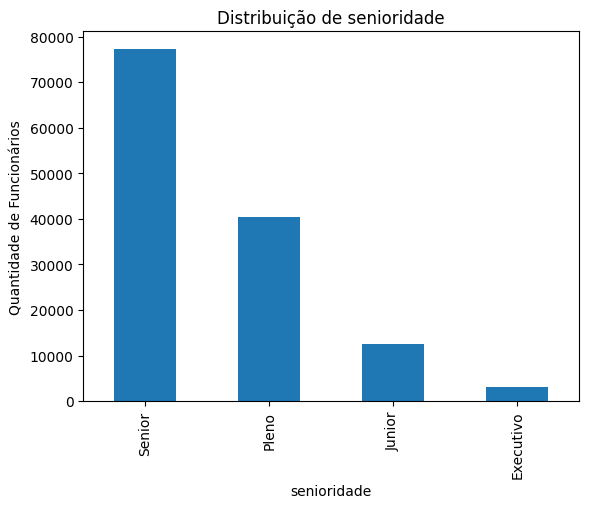

In [32]:
df_limpo['senioridade'].value_counts().plot(kind='bar', ylabel='Quantidade de Funcionários', title="Distribuição de senioridade")

Outras bibliotecas para melhorar a criação de gráficos: "Matplotlib" e "Seaborn"

In [33]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

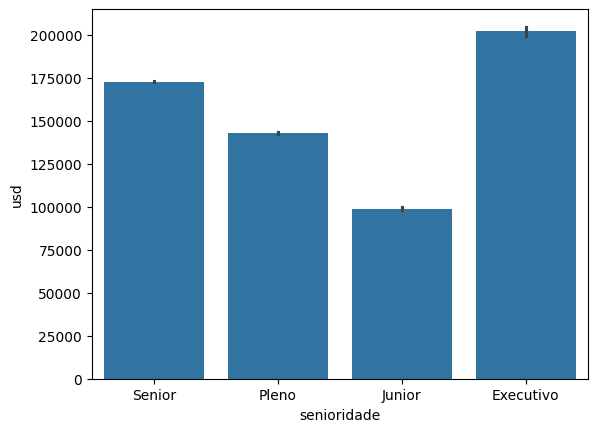

In [36]:
sns.barplot(data=df_limpo, x='senioridade', y='usd')

In [37]:
import matplotlib.pyplot as plt

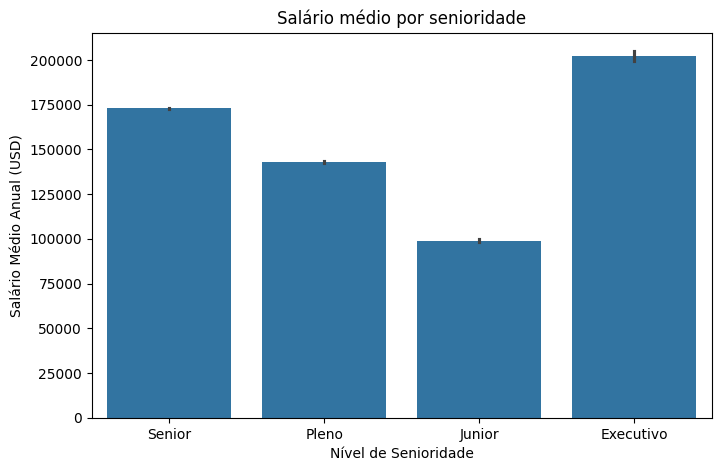

In [39]:
#definição do tamanho do gráfico
plt.figure(figsize=(8,5))
#criação do gráfico
sns.barplot(data=df_limpo, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Nível de Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [ ]:
df_limpo.groupby